# A Study on Genetic Diversity at the DNA Level
# Pattern of the Distribution of Single Nucleotide Polymorphisms (SNPs) on each of the chromosomes


R: = Rubrical reference to conform to the requirements for this project.


R: data used by notebook is included with project as separate files - submitted via Blackboard
R: project submitted as Jupyter Notebook - via Blackboard
R: Juptyter notebook uses Python 3 kernel
R: data gathered from source documented in proposal - via email
R: data gathered in a manner compliant with source constraints - documented via email

In [1]:
import pandas as pd # data processing for CSV file
import numpy as np # linear algebra
import os # for size of file
from time import time # for calculating run time

In [2]:
start_time = time() # begin counting

In [3]:
genome_combo=pd.read_csv("AncestryDNA_Combo.csv", dtype={'allele1': 'category' , 'allele2': 'category', 'genotype2': 'category', 'genotype3': 'category', 'genotype4': 'category', 'genotype5': 'category', 'genotype6': 'category'}) # assigning a name to the pandas dataframe

/Users/SacerdosMDUSA/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6,9,10,13,14,17,18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('size of file on disk:',os.path.getsize("AncestryDNA_Combo.csv")/1000000,'MB')

size of file on disk: 94.266867 MB


R: data used for project is less than 1GB

In [5]:
rows, cols = genome_combo.shape

print ("Number of rows: ", rows)
print ("Number Of columns: ", cols)

Number of rows:  650410
Number Of columns:  25


R: data quantity is appropriate - at least 2000 rows
R: data quantity is appropriate - at least 10 columns
R: data includes text data in a column - allele1, allele2, genotype2 to genotype6
R: data includes categorical data - only four possible values for allele1, allele2, and sixteen for genotype2 to genotype6

In [6]:
genome_combo.dtypes #R: code used for analysis of data characteristization
#alleles and genotypes show us the SNPs. For this project, alleles and genotypes = SNPs (single nucleotide polymorphisms.)

rsid               object
chromosome          int64
position            int64
allele1          category
allele2          category
# rsid_gen2        object
chrom_gen2         object
position_gen2     float64
genotype2        category
# rsid_gen3        object
chrom_gen3         object
position_gen3     float64
genotype3        category
# rsid_gen4        object
chrom_gen4         object
position_gen4     float64
genotype4        category
# rsid_gen5        object
chrom_gen5         object
position_gen5     float64
genotype5        category
# rsid_gen6        object
chrom_gen6         object
position_gen6     float64
genotype6        category
dtype: object

In [7]:
genome_combo.head().T # using T - transpose to show the dataframe with a large number of columns
#R: code used for analysis of data characteristization

,0,1,2,3,4
rsid,rs190214723,rs3131972,rs12562034,rs115093905,rs6681049
chromosome,1,1,1,1,1
position,693625,752721,768448,787173,800007
allele1,T,G,A,G,C
allele2,T,G,G,G,C
# rsid_gen2,rs12564807,rs3131972,rs148828841,rs12124819,rs115093905
chrom_gen2,1,1,1,1,1
position_gen2,734462,752721,760998,776546,787173
genotype2,AA,AG,AC,AA,GG
# rsid_gen3,rs12564807,rs3131972,rs148828841,rs12124819,rs115093905


In [8]:
genome_combo.tail().T

,650405,650406,650407,650408,650409
rsid,rs527236200,rs118203890,rs199474700,rs199474701,rs199474699
chromosome,26,26,26,26,26
position,15943,15950,15965,15967,15990
allele1,T,G,A,G,C
allele2,T,G,A,G,C
# rsid_gen2,NaN,NaN,NaN,NaN,NaN
chrom_gen2,NaN,NaN,NaN,NaN,NaN
position_gen2,NaN,NaN,NaN,NaN,NaN
genotype2,NaN,NaN,NaN,NaN,NaN
# rsid_gen3,NaN,NaN,NaN,NaN,NaN


R: data inconsistences are documented
R: written documentation on what cleaning was performed
R: written analysis of cleaned data for characteristics

All but the first individual had the genotypes (SNPs) in a single column. We can combine 'allele1' and 'allele2' to form 'genotype1'. 

In [9]:
#R: data cleaned (using Python or Pandas) if necessary
#R: data cleaning is performed using programmatic approach

genome_combo['genotype1']=genome_combo[['allele1', 'allele2']].apply(lambda x: ''.join(x), axis=1)

In [10]:
genome_combo.shape  # Sise of the dataframe

(650410, 26)

In [11]:
genome_combo.head().T

,0,1,2,3,4
rsid,rs190214723,rs3131972,rs12562034,rs115093905,rs6681049
chromosome,1,1,1,1,1
position,693625,752721,768448,787173,800007
allele1,T,G,A,G,C
allele2,T,G,G,G,C
# rsid_gen2,rs12564807,rs3131972,rs148828841,rs12124819,rs115093905
chrom_gen2,1,1,1,1,1
position_gen2,734462,752721,760998,776546,787173
genotype2,AA,AG,AC,AA,GG
# rsid_gen3,rs12564807,rs3131972,rs148828841,rs12124819,rs115093905


In [12]:
gc = genome_combo.drop(['allele1', 'allele2'], axis = 1) # dropping unnecessary columns

In [13]:
gc.head().T

,0,1,2,3,4
rsid,rs190214723,rs3131972,rs12562034,rs115093905,rs6681049
chromosome,1,1,1,1,1
position,693625,752721,768448,787173,800007
# rsid_gen2,rs12564807,rs3131972,rs148828841,rs12124819,rs115093905
chrom_gen2,1,1,1,1,1
position_gen2,734462,752721,760998,776546,787173
genotype2,AA,AG,AC,AA,GG
# rsid_gen3,rs12564807,rs3131972,rs148828841,rs12124819,rs115093905
chrom_gen3,1,1,1,1,1
position_gen3,734462,752721,760998,776546,787173


In [14]:
gc.tail().T

,650405,650406,650407,650408,650409
rsid,rs527236200,rs118203890,rs199474700,rs199474701,rs199474699
chromosome,26,26,26,26,26
position,15943,15950,15965,15967,15990
# rsid_gen2,NaN,NaN,NaN,NaN,NaN
chrom_gen2,NaN,NaN,NaN,NaN,NaN
position_gen2,NaN,NaN,NaN,NaN,NaN
genotype2,NaN,NaN,NaN,NaN,NaN
# rsid_gen3,NaN,NaN,NaN,NaN,NaN
chrom_gen3,NaN,NaN,NaN,NaN,NaN
position_gen3,NaN,NaN,NaN,NaN,NaN


In [15]:
#R: written analysis of cleaned data for characteristics

#The genotype refers to the sites of SNPs. The dataframe is now consistent in the SNPs having a pair of nucleotides.

gc.describe(include = 'all').T

#R: data characterization includes analysis of distribution for numerical variables
#R: data characterization includes comparison of categorical variables - We can see that in the 'top' column, 
#R: the most frequent genotype for each subject: 1 - GG; 2 -CC; 3-CC; 4-CC; 5-CC

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rsid,650410,650410,rs2015739,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chromosome,650410,NaN,NaN,NaN,9.72254,6.49799,1,4,9,15,26
position,650410,NaN,NaN,NaN,7.70734e+07,5.77353e+07,608,2.9494e+07,6.63613e+07,1.15611e+08,2.49211e+08
# rsid_gen2,601895,601895,rs7030936,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chrom_gen2,601895,26,1,46662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
position_gen2,601895,NaN,NaN,NaN,7.63793e+07,5.6986e+07,3,2.98227e+07,6.58918e+07,1.14014e+08,2.49219e+08
genotype2,601895,19,CC,117772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
# rsid_gen3,610526,610526,rs7030936,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chrom_gen3,610526,26,1,47743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
position_gen3,610526,NaN,NaN,NaN,7.65932e+07,5.68977e+07,3,3.00679e+07,6.60684e+07,1.14129e+08,2.49219e+08


In [16]:
R, C = gc.shape

print ("Number of rows: ", R)
print ("Number Of columns: ", C)

Number of rows:  650410
Number Of columns:  24


In [17]:
import missingno as msno # Another way to visualize the shape of the dataframe

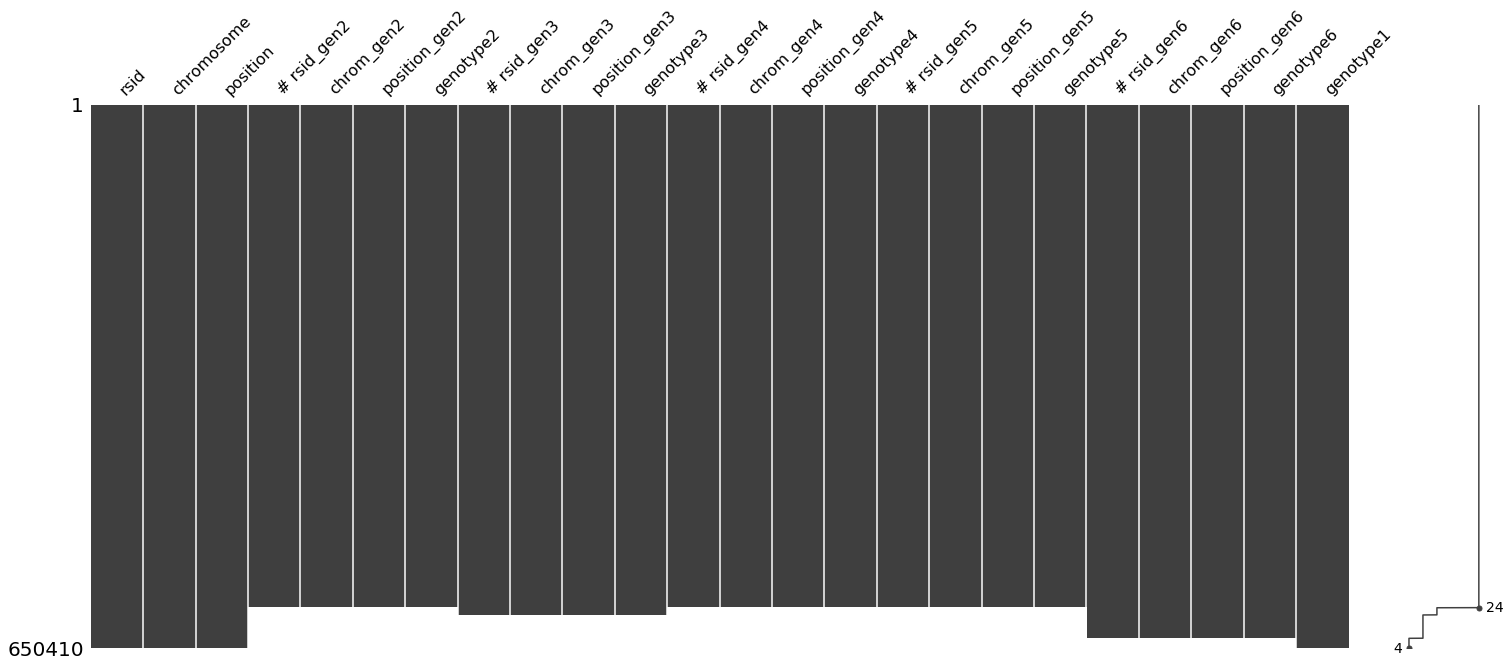

In [18]:
msno.matrix(gc);    #R: data inconsistences are documented

Checking to see the number of actions on the chromosomes.

In [19]:
desc = [gc['chromosome'].describe(), gc['chrom_gen2'].describe(), gc['chrom_gen3'].describe(), gc['chrom_gen4'].describe(),gc['chrom_gen5'].describe(),gc['chrom_gen6'].describe()]

In [20]:
desc #R: data inconsistences are documented - chromosome is float 64 while chrom_gen2 to _gen6 are int64. 
     #This inconsistency does not affect our calculations.

[count    650410.000000
 mean          9.722538
 std           6.497986
 min           1.000000
 25%           4.000000
 50%           9.000000
 75%          15.000000
 max          26.000000
 Name: chromosome, dtype: float64, count     601895
 unique        26
 top            1
 freq       46662
 Name: chrom_gen2, dtype: int64, count     610526
 unique        26
 top            1
 freq       47743
 Name: chrom_gen3, dtype: int64, count     601895
 unique        26
 top            1
 freq       46662
 Name: chrom_gen4, dtype: int64, count     601895
 unique        26
 top            1
 freq       46662
 Name: chrom_gen5, dtype: int64, count     638469
 unique        26
 top            2
 freq       51771
 Name: chrom_gen6, dtype: int64]

Finding the unique numbers of chromosomes being tested for the individuals concerned.

In [21]:
unq = [gc['chromosome'].unique(), gc['chrom_gen2'].unique(), gc['chrom_gen3'].unique(), gc['chrom_gen4'].unique(),gc['chrom_gen5'].unique(),gc['chrom_gen6'].unique()]

In [22]:
unq 

#R: data inconsistences are documented - The numbering system of the chromosomes of the first suject 
# is different from the rest. 
# No change needed as subject one's array is beneficial for graphing and best fit lines/curves 
# while the other array may be used for bar charts exclusively.

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, '20', '21', '22', 'X', 'Y', 'MT', nan], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, '20', '21', '22', 'X', 'Y', 'MT', nan], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, '20', '21', '22', 'X', 'Y', 'MT', nan], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, '20', '21', '22', 'X', 'Y', 'MT', nan], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, '20', '21', '22', 'X', 'Y', 'MT', nan], dtype=object)]

Now, let's find out the number of unqiue genotypes or SNPs on each of the chromosomes for the subjects in the dataset.

In [23]:
chromo_count1 = []
for i in range(len(gc.chroosome.unique())):
    chromo_count1.append(gc.chromosome[gc.chromosome == gc.chromosome.unique()[i]].count())
print('The number of SNPs on each chromosome for individual #1:', chromo_count1)
print ('_____________________________________________________________________________________________________________')

chromo_count2 = []
for i in range(len(gc.chrom_gen2.unique())):
    chromo_count2.append(gc.chrom_gen2[gc.chrom_gen2 == gc.chrom_gen2.unique()[i]].count())
print('The number of SNPs on each chromosome for individual #2:', chromo_count2)
print ('_____________________________________________________________________________________________________________')

chromo_count3 = []
for i in range(len(gc.chrom_gen3.unique())):
    chromo_count3.append(gc.chrom_gen3[gc.chrom_gen3 == gc.chrom_gen3.unique()[i]].count())
print('The number of SNPs on each chromosome for individual #3:', chromo_count3)
print ('_____________________________________________________________________________________________________________')

chromo_count4 = []
for i in range(len(gc.chrom_gen4.unique())):
    chromo_count4.append(gc.chrom_gen4[gc.chrom_gen4 == gc.chrom_gen4.unique()[i]].count())
print('The number of SNPs on each chromosome for individual #4:', chromo_count4)
print ('_____________________________________________________________________________________________________________')

chromo_count5 = []
for i in range(len(gc.chrom_gen5.unique())):
    chromo_count5.append(gc.chrom_gen5[gc.chrom_gen5 == gc.chrom_gen5.unique()[i]].count())
print('The number of SNPs on each chromosome for individual #5:', chromo_count5)
print ('_____________________________________________________________________________________________________________')

chromo_count6 = []
for i in range(len(gc.chrom_gen6.unique())):
    chromo_count6.append(gc.chrom_gen6[gc.chrom_gen6 == gc.chrom_gen6.unique()[i]].count())
print('The number of SNPs on each chromosome for individual #6:', chromo_count6)
print ('_____________________________________________________________________________________________________________')


The number of SNPs on each chromosome for individual #1: [49513, 51093, 40130, 35289, 37654, 40135, 34066, 30853, 28714, 31978, 31468, 31004, 22937, 20541, 20113, 22855, 21606, 18473, 15681, 16787, 9529, 10125, 27473, 1729, 500, 164]
_____________________________________________________________________________________________________________
The number of SNPs on each chromosome for individual #2: [46662, 46128, 38517, 33915, 34387, 40384, 33053, 30268, 26586, 29210, 29328, 28451, 21679, 18696, 18281, 19199, 18743, 16490, 13002, 14077, 417, 8461, 9098, 19478, 2302, 5083, 0]
_____________________________________________________________________________________________________________
The number of SNPs on each chromosome for individual #3: [47743, 46814, 39186, 34384, 34900, 40964, 33551, 30651, 27010, 29589, 29882, 29066, 21880, 19002, 18660, 19679, 19364, 16643, 13948, 4140, 10590, 8571, 9307, 19586, 2129, 3287, 0]
_______________________________________________________________________

In [24]:
temp = pd.DataFrame()   # data processing for SNPs vis-a-vis unique chromosomes
temp['unique'] = gc.chromosome.unique()  # The first individual's data structure is different from the rest. 
temp['SNP1'] = chromo_count1    # So, we will handle this separately first.

In [25]:
temp

,unique,SNP1
0,1,49513
1,2,51093
2,3,40130
3,4,35289
4,5,37654
5,6,40135
6,7,34066
7,8,30853
8,9,28714
9,10,31978


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

R: data characterization includes analysis of correlation for pairs of numerical variables
R: analysis includes at least two visualizations of data
R: visualization implemented using appropriate plot types
R: visualizations generated programmatically
R: visualization has labeled axes and caption
R: axis label for visualization includes units if appropriate
R: visualization is intuitive to understand and not misleading
R: code used for getting data, cleaning, analysis, and visualization is concise

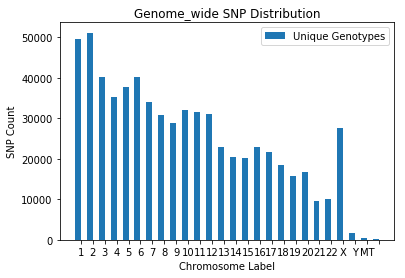

In [27]:
N = 26   # Visualizing the SNP distribution for subject #1

ind = np.arange(N) 
width = .5       
plt.bar(ind, temp.SNP1.values, width, label='Unique Genotypes')

plt.ylabel('SNP Count')
plt.xlabel('Chromosome Label')
plt.title('Genome_wide SNP Distribution')

plt.xticks(ind + width / 2, ('1', '2', '3', '4', '5', '6', 
                             '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19', '20', '21', '22', 'X', 'Y', 'MT'))
plt.legend(loc='best')
plt.show()

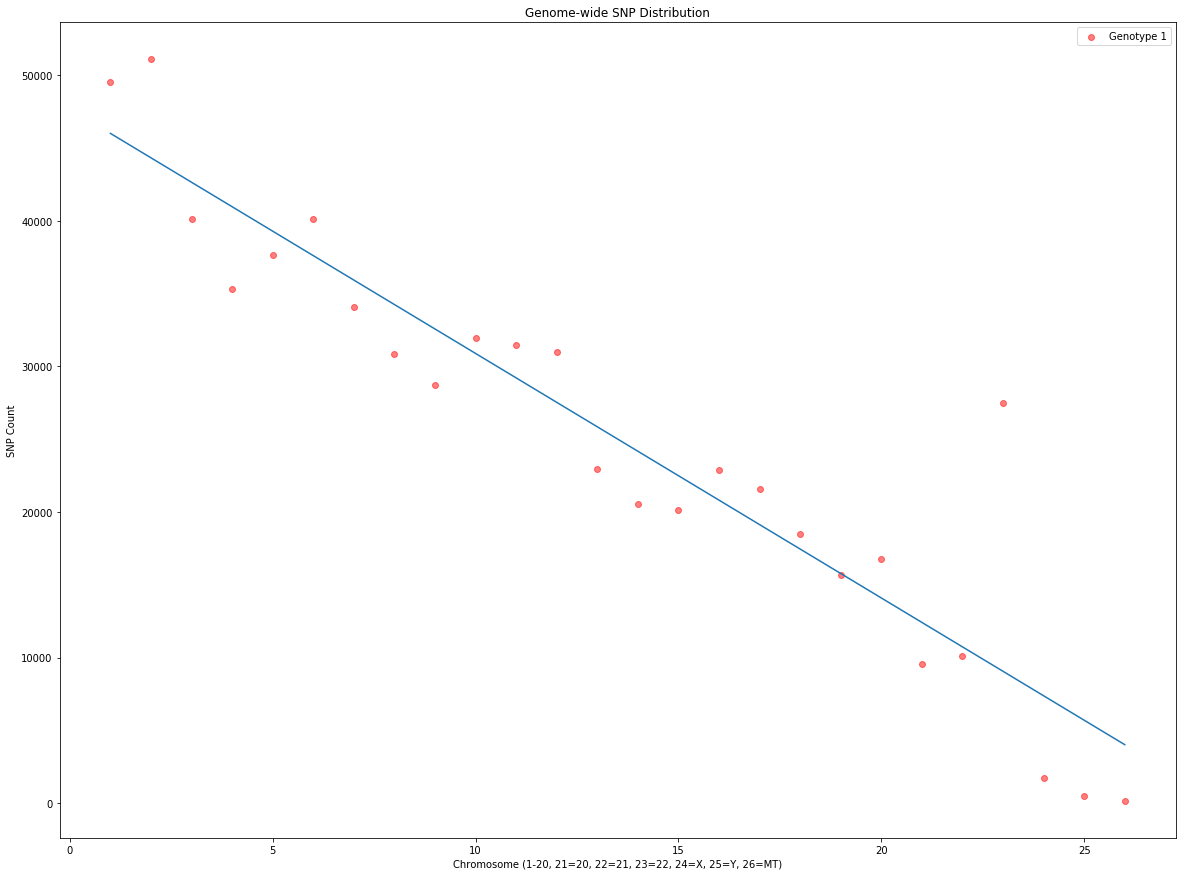

In [28]:
plt.figure(figsize=(20,15))
plt.scatter(temp['unique'], temp['SNP1'], alpha=0.5, label='Genotype 1', color='red')

plt.title('Genome-wide SNP Distribution')
plt.legend(loc='best')
plt.xlabel('Chromosome (1-20, 21=20, 22=21, 23=22, 24=X, 25=Y, 26=MT)')
plt.ylabel('SNP Count')

plt.plot(np.unique(temp['unique']) , np.poly1d(np.polyfit(temp['unique'] , temp['SNP1'], 1))(np.unique(temp['unique'] )))

plt.show()

R: implement code that tests predictions
R: pattern predictions are made -

The other subjects may follow a similar SNP distribution pattern as observed for subject 1. Let's test this prediction alongside subject 1 using the following code. As part of the analysis, some more data cleaning is required as follows.


In [29]:
temp2 = pd.DataFrame()   # Data processing for the rest of the subjects
temp2['Chromosomes'] = gc.chrom_gen2.unique()  
temp2['SNP2'] = chromo_count2
temp2['SNP3'] = chromo_count3
temp2['SNP4'] = chromo_count4
temp2['SNP5'] = chromo_count5
temp2['SNP6'] = chromo_count6

In [30]:
temp2

,Chromosomes,SNP2,SNP3,SNP4,SNP5,SNP6
0,1,46662,47743,46662,46662,49510
1,2,46128,46814,46128,46128,51771
2,3,38517,39186,38517,38517,43023
3,4,33915,34384,33915,33915,39473
4,5,34387,34900,34387,34387,37028
5,6,40384,40964,40384,40384,44021
6,7,33053,33551,33053,33053,34356
7,8,30268,30651,30268,30268,31681
8,9,26586,27010,26586,26586,26445
9,10,29210,29589,29210,29210,30522


R: data inconsistences are documented - resolved as follows.
R: data cleaned (using Python or Pandas) if necessary - see below.
R: data cleaning is performed using programmatic approach - see below.

In [31]:
#R: written documentation on what cleaning was performed - see below.
temp2.drop([26])  # Dropping row 26 of temp2 in order to join with dataframe (temp) of subject 1

,Chromosomes,SNP2,SNP3,SNP4,SNP5,SNP6
0,1,46662,47743,46662,46662,49510
1,2,46128,46814,46128,46128,51771
2,3,38517,39186,38517,38517,43023
3,4,33915,34384,33915,33915,39473
4,5,34387,34900,34387,34387,37028
5,6,40384,40964,40384,40384,44021
6,7,33053,33551,33053,33053,34356
7,8,30268,30651,30268,30268,31681
8,9,26586,27010,26586,26586,26445
9,10,29210,29589,29210,29210,30522


In [32]:
temp1 = temp.join(temp2)

In [33]:
temp1  # Newly combined dataframe

,unique,SNP1,Chromosomes,SNP2,SNP3,SNP4,SNP5,SNP6
0,1,49513,1,46662,47743,46662,46662,49510
1,2,51093,2,46128,46814,46128,46128,51771
2,3,40130,3,38517,39186,38517,38517,43023
3,4,35289,4,33915,34384,33915,33915,39473
4,5,37654,5,34387,34900,34387,34387,37028
5,6,40135,6,40384,40964,40384,40384,44021
6,7,34066,7,33053,33551,33053,33053,34356
7,8,30853,8,30268,30651,30268,30268,31681
8,9,28714,9,26586,27010,26586,26586,26445
9,10,31978,10,29210,29589,29210,29210,30522


In [34]:
temp1.describe(include='all')  #R: code used for analysis of data characteristization

,unique,SNP1,Chromosomes,SNP2,SNP3,SNP4,SNP5,SNP6
count,26.000000,26.000000,26,26.000000,26.000000,26.000000,26.000000,26.000000
unique,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
mean,13.500000,25015.769231,NaN,23149.807692,23481.769231,23149.807692,23149.807692,24556.500000
std,7.648529,13782.462872,NaN,12860.169007,13063.892444,12860.169007,12860.169007,14075.217404
min,1.000000,164.000000,NaN,417.000000,2129.000000,417.000000,417.000000,3733.000000
25%,7.250000,17208.500000,NaN,14680.250000,14621.750000,14680.250000,14680.250000,15291.750000
50%,13.500000,25205.000000,NaN,20578.500000,20779.500000,20578.500000,20578.500000,21238.000000
75%,19.750000,33544.000000,NaN,32356.750000,32826.000000,32356.750000,32356.750000,33687.250000


R: written analysis of cleaned data for characteristics

There are 26 unique counts of the different types of chromosomes recorded. In reality, human beings have 23 chromosomes, the 23rd one being a combination being a combination of XX or XY in most cases. There is also mitochondrial DNA in the mitochondria of human cells, which has its own genome. If we separate the 23rd chromosome into 2, then we will have a total of 25 counts as a result. The 26th count for subjects 2 to 6 was due to the extra data for chromosome 20. It is unclear what the extra count for subject one came from. This cleaned data also reveals that the range of the total SNPs is from about 23000 to 25000 for all subjects in the study.

# Visualization of SNPs in all subjects of the dataset

R: code used for analysis of data characteristization

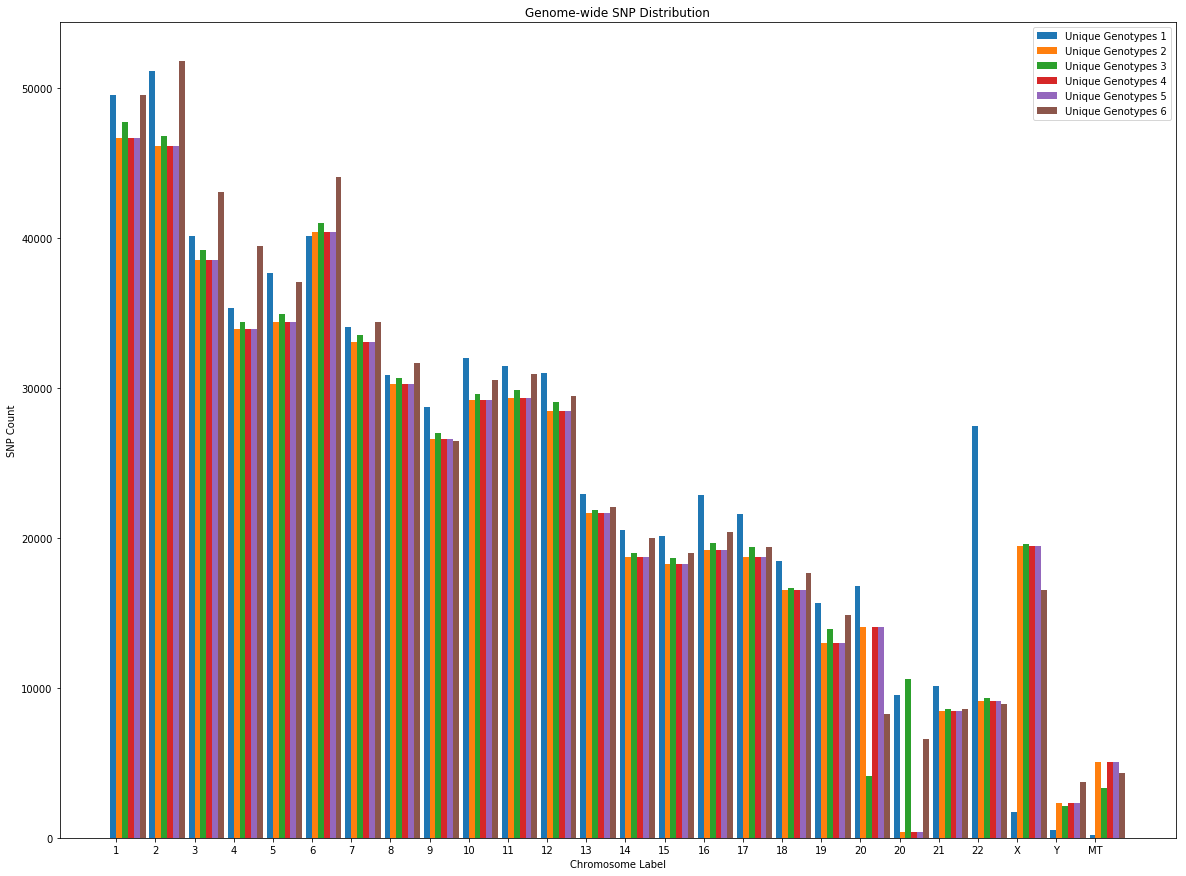

In [35]:
N = 26

ind = np.arange(N) 
width = .15 
plt.figure(figsize=(20,15))
plt.bar(ind, temp1.SNP1.values, width, label='Unique Genotypes 1')
plt.bar(ind + width, temp1.SNP2.values, width, label='Unique Genotypes 2')
plt.bar(ind + width + width, temp1.SNP3.values, width, label='Unique Genotypes 3')
plt.bar(ind + width + width + width, temp1.SNP4.values, width, label='Unique Genotypes 4')
plt.bar(ind + width + width + width + width , temp1.SNP5.values, width, label='Unique Genotypes 5')
plt.bar(ind + width + width + width + width + width , temp1.SNP6.values, width, label='Unique Genotypes 6')

plt.ylabel('SNP Count')
plt.xlabel('Chromosome Label')
plt.title('Genome-wide SNP Distribution')

plt.xticks(ind + width / 2, ('1', '2', '3', '4', '5', '6', 
                             '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19', '20', '20', '21', '22', 'X', 'Y', 'MT'))
plt.legend(loc='best')
plt.show()

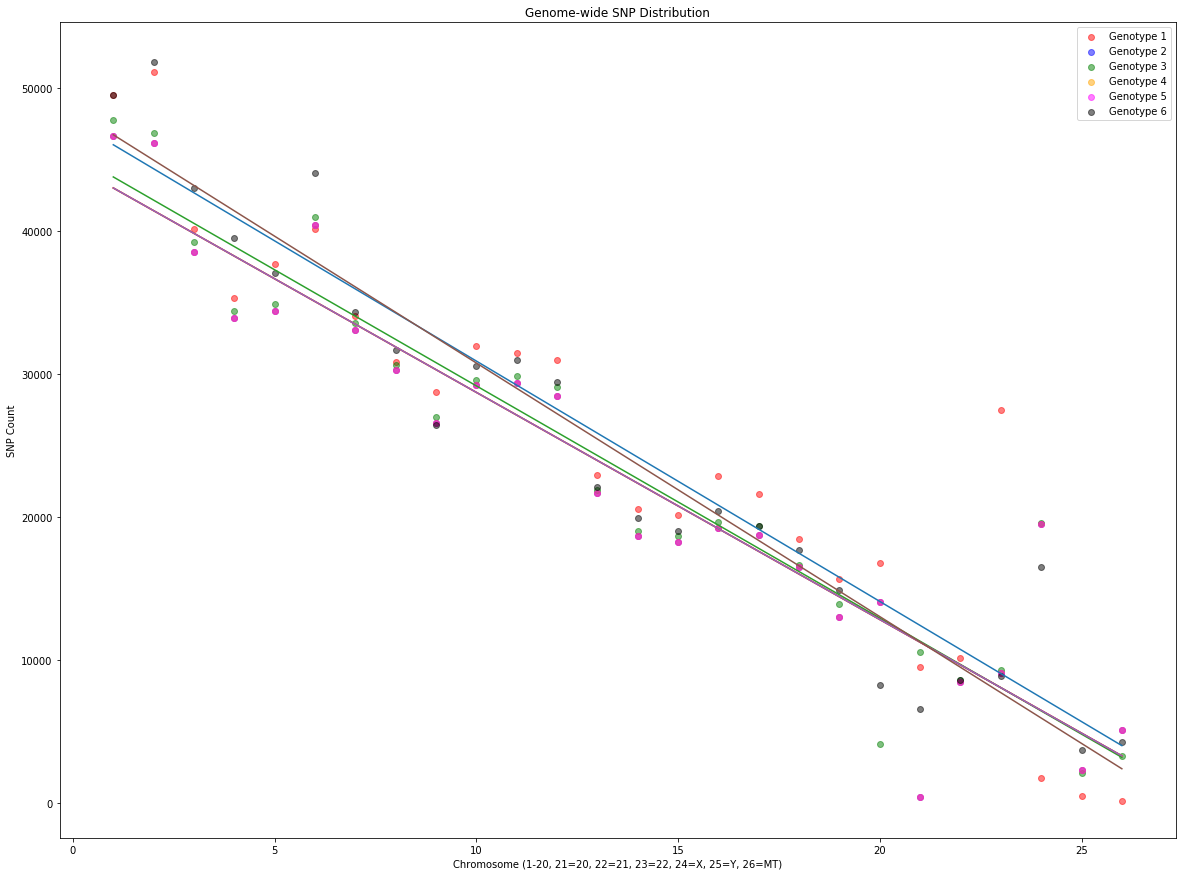

In [36]:
plt.figure(figsize=(20,15))
plt.scatter(temp1['unique'], temp1['SNP1'], alpha=0.5, label='Genotype 1', color='red')
plt.scatter(temp1['unique'], temp1['SNP2'], alpha=0.5, label='Genotype 2', color='blue')
plt.scatter(temp1['unique'], temp1['SNP3'], alpha=0.5, label='Genotype 3', color='green')
plt.scatter(temp1['unique'], temp1['SNP4'], alpha=0.5, label='Genotype 4', color='orange')
plt.scatter(temp1['unique'], temp1['SNP5'], alpha=0.5, label='Genotype 5', color='magenta')
plt.scatter(temp1['unique'], temp1['SNP6'], alpha=0.5, label='Genotype 6', color='black')

plt.title('Genome-wide SNP Distribution')
plt.legend(loc='best')
plt.xlabel('Chromosome (1-20, 21=20, 22=21, 23=22, 24=X, 25=Y, 26=MT)')
plt.ylabel('SNP Count')

plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP1'], 1))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP2'], 1))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP3'], 1))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP4'], 1))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP5'], 1))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP6'], 1))(np.unique(temp1['unique'] )))

plt.show()

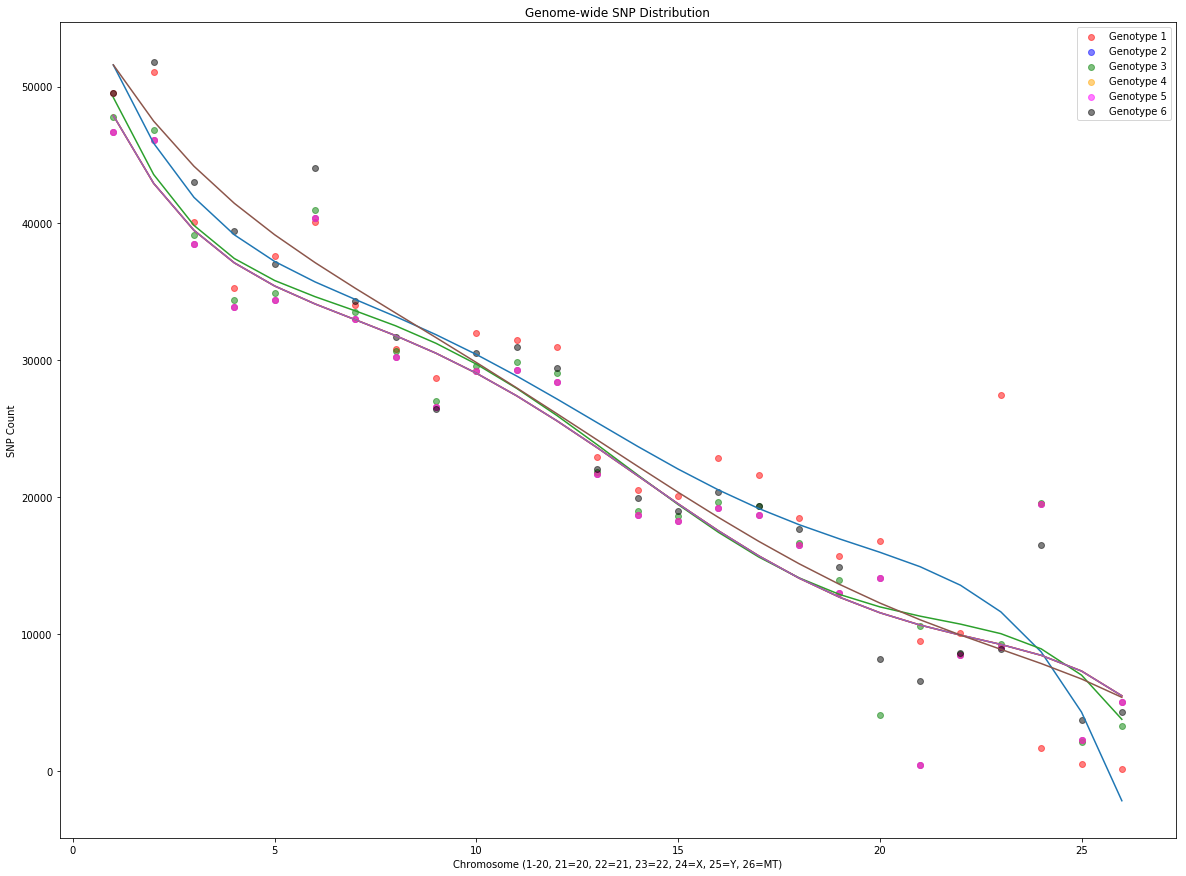

In [37]:
plt.figure(figsize=(20,15))
plt.scatter(temp1['unique'], temp1['SNP1'], alpha=0.5, label='Genotype 1', color='red')
plt.scatter(temp1['unique'], temp1['SNP2'], alpha=0.5, label='Genotype 2', color='blue')
plt.scatter(temp1['unique'], temp1['SNP3'], alpha=0.5, label='Genotype 3', color='green')
plt.scatter(temp1['unique'], temp1['SNP4'], alpha=0.5, label='Genotype 4', color='orange')
plt.scatter(temp1['unique'], temp1['SNP5'], alpha=0.5, label='Genotype 5', color='magenta')
plt.scatter(temp1['unique'], temp1['SNP6'], alpha=0.5, label='Genotype 6', color='black')

plt.title('Genome-wide SNP Distribution')
plt.legend(loc='best')
plt.xlabel('Chromosome (1-20, 21=20, 22=21, 23=22, 24=X, 25=Y, 26=MT)')
plt.ylabel('SNP Count')

#Best fit curve based on 5th order polynomial. It appears that three lines overlap with each other.

plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP1'], 5))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP2'], 5))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP3'], 5))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP4'], 5))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP5'], 5))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP6'], 5))(np.unique(temp1['unique'] )))

plt.show()

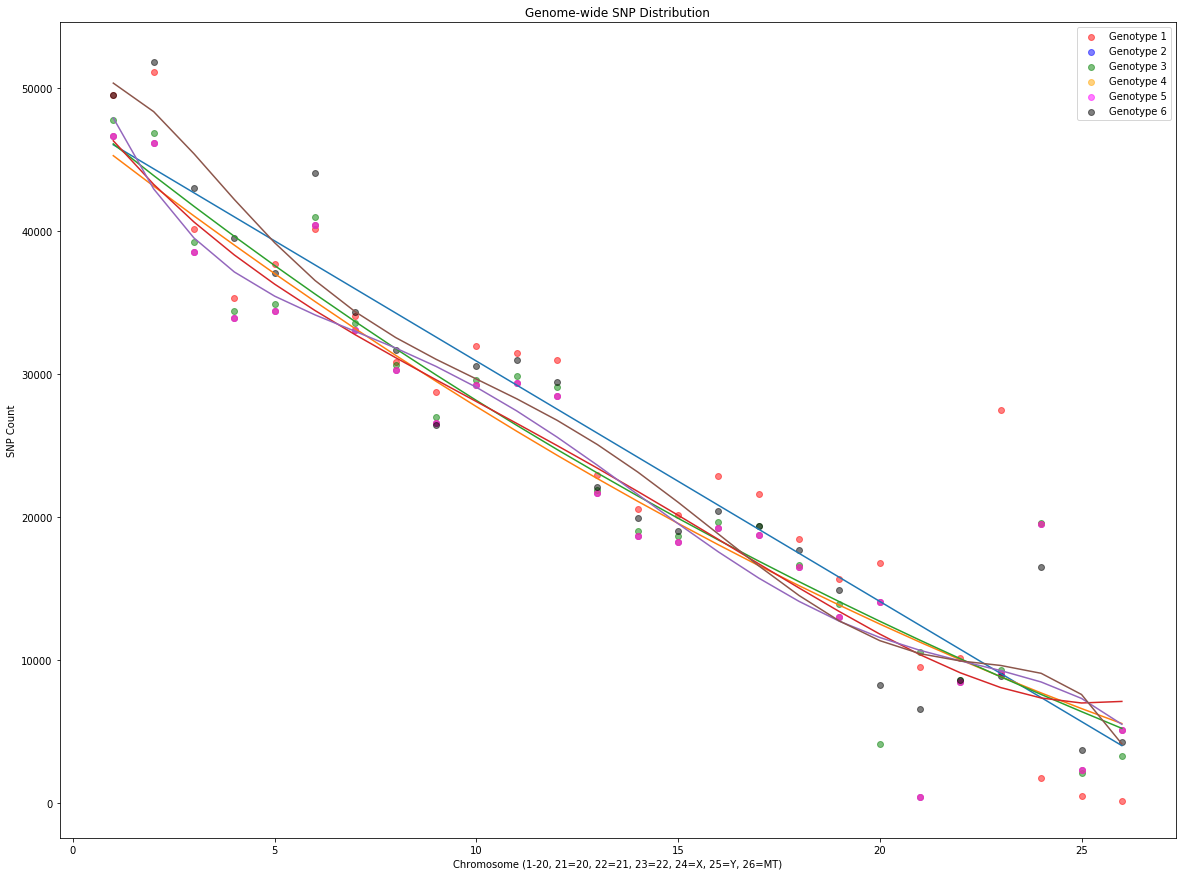

In [38]:
plt.figure(figsize=(20,15))
plt.scatter(temp1['unique'], temp1['SNP1'], alpha=0.5, label='Genotype 1', color='red')
plt.scatter(temp1['unique'], temp1['SNP2'], alpha=0.5, label='Genotype 2', color='blue')
plt.scatter(temp1['unique'], temp1['SNP3'], alpha=0.5, label='Genotype 3', color='green')
plt.scatter(temp1['unique'], temp1['SNP4'], alpha=0.5, label='Genotype 4', color='orange')
plt.scatter(temp1['unique'], temp1['SNP5'], alpha=0.5, label='Genotype 5', color='magenta')
plt.scatter(temp1['unique'], temp1['SNP6'], alpha=0.5, label='Genotype 6', color='black')

plt.title('Genome-wide SNP Distribution')
plt.legend(loc='best')
plt.xlabel('Chromosome (1-20, 21=20, 22=21, 23=22, 24=X, 25=Y, 26=MT)')
plt.ylabel('SNP Count')

#Best fit line and curves, different for each. The purpose is to differentiate the six approximations visually from each other.
#This visualization shows that all six subjects are indeed present. But we should refer to the previous graph for
#a more reasonable representation of the data.

plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP1'], 1))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP2'], 2))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP3'], 3))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP4'], 4))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP5'], 5))(np.unique(temp1['unique'] )))
plt.plot(np.unique(temp1['unique']) , np.poly1d(np.polyfit(temp1['unique'] , temp1['SNP6'], 6))(np.unique(temp1['unique'] )))

plt.show()

R: written story of patterns observed
R: primary observation is documented in writing
R: two or more secondary observations are documented in writing
R: In addition to the documentation throughout your code, summarize what you did in this project
R: explain what you learned doing this project

# As we move from chromosome 1 to chromosome 22 and beyond, the number of SNPs decreases. This fulfills the original hypothesis.
# Secondary observations.
# 1. Because SNPs can indicate genetic diversity, there is more genetic diversity on chromosome 1 than any other chromosomes.
# 2. The linear regression model supports a decrease in genetic diversity as we move from chromosome 1 to 22 and beyond.
# 3. The best fit curves also support this observation.
# 4. Despite the different sources of the data (23andMe & AncestryDNA), a similar pattern was observed in the cross-platform analysis.

Summary: In this project, I took data from DNA analysis samples from AncestryDNA and 23andMe to look for patterns in genetic diversity. I started with the hypothesis that more diversity exists in chromosomes of lower numbers (e.g., 1,3..). I postulated that because I knew that there are relatively more genes in those chromosomes than the ones that are numbered higher. In the course of the analysis, not only did I find my hypothesis supported by my data analysis, I also observed a pattern of decreasing genetic diversity as we move in the ascending order of the chromosomes. This observation was further validated by testing data from other subjects. 

I also learned that finding reliable data for analysis could take a long time in addition to figuring out the most optimal method to clean the data for analysis. All in all, having expertise in the field of the subject matter - computational genetics - really came in handy for me when I was trying to make sense of the data. Thus, it would behoove us as aspiring data scientists to remember to seek help from subject matter experts when presented with data from fields in which we do not have expertise. Last but not least, being able to take a project from start to completion can bring immense joy and satisfaction as we continue to develop our data science skill sets.  

In [39]:
elapsed_time = time() - start_time
print('The time required to run this final project Jupyter Notebook is {} seconds.'.format(elapsed_time))

The time required to run this final project Jupyter Notebook is 73.51658701896667 seconds.


R: Jupyter notebook finishes execution in less than 5 minutes
R: Jupyter notebook cells run without errors
R: Jupyter notebook cells execute in order